## Observations and Insights

* The drug regimens Capomulin and Ramicane are the most prolifically used.


* When mouse s185 was treated with Capomulin, the tumor volume present in her decreased over time.


* There is a positive correlation between the weight of each mouse that was treated with the Capomulin regimen and the average tumor volume. And since the p-value is 1.32e-07, which is less than 0.05, it is statistically significant.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# print the data
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen

# identify each variable by grouping by the drug regimen and looking in the tumor vol column
tumor_mean = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# create a table of all the information
summary_df = pd.DataFrame({
    "Mean Tumor Vol": tumor_mean,
    "Median Tumor Vol": tumor_median,
    "Tumor Vol Variance": tumor_var,
    "Tumor Vol Std. Dev.": tumor_std,
    "Tumor Vol Std. Error": tumor_sem
})

# print the table
summary_df

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Std. Dev.,Tumor Vol Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0.5, 1.0, 'Data Points per Drug Regimen')

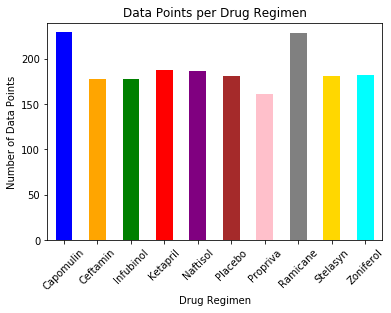

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# count all the data points for each drug
count_drug = complete_data.groupby("Drug Regimen")["Drug Regimen"].count()

# different colors per drug
color_list = ["blue", "orange", "green", "red", "purple", "brown", "pink", "grey", "gold", "aqua"]

# create the bar chart and set axes limits
drug_chart = count_drug.plot(kind="bar", color = color_list, rot=45)
drug_chart.set_xlim([-0.5,9.5])
drug_chart.set_ylim([0,240])

# add labels
drug_chart.set_ylabel("Number of Data Points")
drug_chart.set_title("Data Points per Drug Regimen")

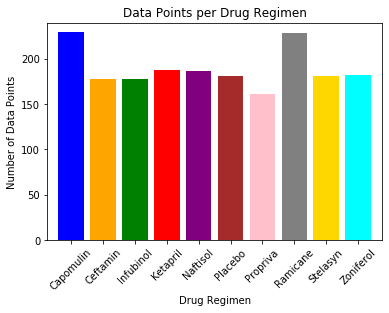

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# create an array of all the drugs in alphabetical order
drug_names = []
for drug in complete_data["Drug Regimen"]:
    if drug not in drug_names:
        drug_names.append(drug)
        drug_names = sorted(drug_names)

# create x axis and tick locations
x_axis = np.arange(0, len(drug_names))
tick_locations = [] 
for x in x_axis:
    tick_locations.append(x)

# add labels
plt.title("Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

# create x and y limits using count_drug created above
plt.xlim(-0.75, len(count_drug)-0.25)
plt.ylim(0, max(count_drug) + 10)

# put bar chart together, color the bars using the color_list above, and rotate x labels
plt.bar(x_axis, count_drug, color=color_list, align="center")
plt.xticks(tick_locations, drug_names)
plt.xticks(rotation=45)
plt.show()

## Pie plots

Text(0.5, 1.0, 'Percentage of Male vs Female Mice')

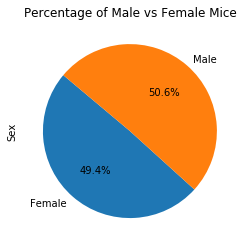

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# count the number of female and male mice used
mice_sex = complete_data.groupby("Sex")["Sex"].count()

# create pie chart
mice_chart = mice_sex.plot(kind = "pie", autopct='%1.1f%%', startangle=140)
mice_chart.set_title("Percentage of Male vs Female Mice")

Text(0.5, 1.0, 'Percentage of Male vs Female Mice')

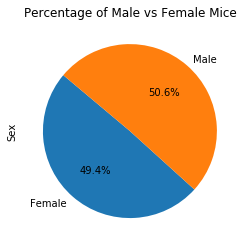

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# Creates the pie chart based upon the mice_sex values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(mice_sex, labels=labels, autopct="%1.1f%%", shadow=False, startangle=140)
plt.ylabel("Sex")
plt.title("Percentage of Male vs Female Mice")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# group data by Mouse ID and find the max Timepoint, use this to find the final tumor vol
# https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby
idx = complete_data.groupby("Mouse ID")["Timepoint"].transform(max) == complete_data["Timepoint"]
max_timepoint = complete_data[idx]

# create an array for each of the four most promising treatment regimens
capomulin = max_timepoint.loc[max_timepoint["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
ramicane = max_timepoint.loc[max_timepoint["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
infubinol = max_timepoint.loc[max_timepoint["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
ceftamin = max_timepoint.loc[max_timepoint["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]

# Calculate the quartiles and IQR  from each of the above arrays
# Quantitatively determine if there are any potential outliers.
ca_quartiles = capomulin.quantile([.25,.5,.75])
ca_lowerq = ca_quartiles[0.25]
ca_upperq = ca_quartiles[0.75]
ca_iqr = ca_upperq-ca_lowerq
ca_lower_bound = ca_lowerq - (1.5*ca_iqr)
ca_upper_bound = ca_upperq + (1.5*ca_iqr)
outlier_ca = capomulin.loc[(capomulin < ca_lower_bound) | (capomulin > ca_upper_bound)]

print(f"The lower quartile of Capomulin is: {ca_lowerq}")
print(f"The upper quartile of Capomulin is: {ca_upperq}")
print(f"The interquartile range of Capomulin is: {ca_iqr}")
print(f"The the median of Capomulin is: {ca_quartiles[0.5]} ")
print(f"Values below {ca_lower_bound} could be outliers.")
print(f"Values above {ca_upper_bound} could be outliers.")
print(f"There are {len(outlier_ca)} outliers for the drug Capomulin.")
print("-----------------------------------------------------")

r_quartiles = ramicane.quantile([.25,.5,.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq-r_lowerq
r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
outlier_r = ramicane.loc[(ramicane < r_lower_bound) | (ramicane > r_upper_bound)]

print(f"The lower quartile of Ramicane is: {r_lowerq}")
print(f"The upper quartile of Ramicane is: {r_upperq}")
print(f"The interquartile range of Ramicane is: {r_iqr}")
print(f"The the median of Ramicane is: {r_quartiles[0.5]} ")
print(f"Values below {r_lower_bound} could be outliers.")
print(f"Values above {r_upper_bound} could be outliers.")
print(f"There are {len(outlier_r)} outliers for the drug Ramicane.")
print("-----------------------------------------------------")

i_quartiles = infubinol.quantile([.25,.5,.75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq-i_lowerq
i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
outlier_i = infubinol.loc[(infubinol < i_lower_bound) | (infubinol > i_upper_bound)]

print(f"The lower quartile of Infubinol is: {i_lowerq}")
print(f"The upper quartile of Infubinol is: {i_upperq}")
print(f"The interquartile range of Infubinol is: {i_iqr}")
print(f"The the median of Infubinol is: {i_quartiles[0.5]} ")
print(f"Values below {i_lower_bound} could be outliers.")
print(f"Values above {i_upper_bound} could be outliers.")
print(f"There is {len(outlier_i)} outlier for the drug Infubinol.")
print(f"The outlier is {outlier_i.min()}.")
print("-----------------------------------------------------")

c_quartiles = ceftamin.quantile([.25,.5,.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq-c_lowerq
c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)
outlier_c = ceftamin.loc[(ceftamin < c_lower_bound) | (ceftamin > c_upper_bound)]

print(f"The lower quartile of Ceftamin is: {c_lowerq}")
print(f"The upper quartile of Ceftamin is: {c_upperq}")
print(f"The interquartile range of Ceftamin is: {c_iqr}")
print(f"The the median of Ceftamin is: {c_quartiles[0.5]} ")
print(f"Values below {c_lower_bound} could be outliers.")
print(f"Values above {c_upper_bound} could be outliers.")
print(f"There are {len(outlier_c)} outliers for the drug Ceftamin.")
print("-----------------------------------------------------")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are 0 outliers for the drug Capomulin.
-----------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are 0 outliers for the drug Ramicane.
-----------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values belo

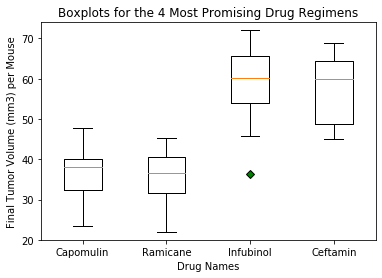

In [8]:
# Combine four different drug arrays together
var = [capomulin,ramicane,infubinol,ceftamin]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplots for the 4 Most Promising Drug Regimens')
ax1.set_xlabel('Drug Names')
ax1.set_ylabel('Final Tumor Volume (mm3) per Mouse')
ax1.boxplot(var, flierprops=green_diamond)
plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.xlim(0.5,4.5)
plt.ylim(20,74)
plt.show()

## Line and scatter plots

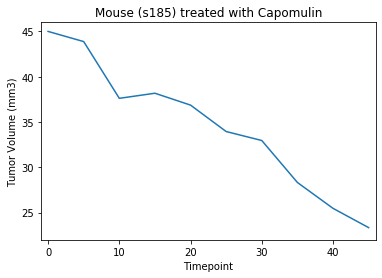

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# pick one Mouse
one_mouse = complete_data[complete_data["Mouse ID"]=="s185"]

# identify the x and y axis info
x_axis = one_mouse["Timepoint"]
y_axis = one_mouse["Tumor Volume (mm3)"]

# create a line plot
plt.plot(x_axis,y_axis)

# add labels
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse (s185) treated with Capomulin")
plt.xlim(-1,46)
plt.ylim(22,46)
plt.show()

Text(0.5, 1.0, 'Mice for the Capomulin regimen')

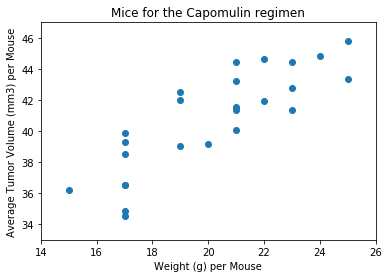

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# filter for only the Capomulin regimen, then group by Mouse
one_drug = complete_data[complete_data["Drug Regimen"]=="Capomulin"]
drug_permouse = one_drug.groupby("Mouse ID")

# Identify the x and y axes
weight = drug_permouse["Weight (g)"].min()
avg_tv = drug_permouse["Tumor Volume (mm3)"].mean()

# create scatter plot
plt.scatter(weight,avg_tv)
plt.xlim(14,26)
plt.ylim(33,47)

# add labels
plt.xlabel("Weight (g) per Mouse")
plt.ylabel("Average Tumor Volume (mm3) per Mouse")
plt.title("Mice for the Capomulin regimen")

The Correlation Coefficient is: 0.84
The linear regression equation is: y = 0.95x + 21.55


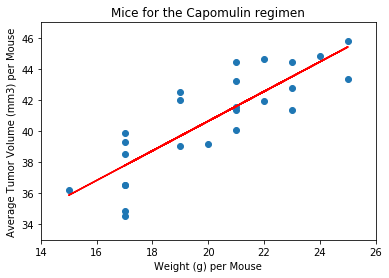

In [11]:
# Calculate the correlation coefficient and linear regression model for
# mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tv)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot with labels
plt.scatter(weight,avg_tv)
plt.xlim(14,26)
plt.ylim(33,47)
plt.plot(weight,regress_values,"r-")
plt.xlabel("Weight (g) per Mouse")
plt.ylabel("Average Tumor Volume (mm3) per Mouse")
plt.title("Mice for the Capomulin regimen")
print(f"The Correlation Coefficient is: {round(st.pearsonr(weight,avg_tv)[0],2)}")
print(f"The linear regression equation is: {line_eq}")
plt.show()

# To see p-value
# print(st.pearsonr(weight,avg_tv))